# Data Wrangling
It is a process of cleaning, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making. Data wrangling is an iterative process that involves the following steps:
- Gathering data
- Assessing data
- Cleaning data
  - Removing Extra Columns
  - Deal with Missing Values
  - Duplicate Values
  - Outliers
    - Visualizing Outliers
    - IQR Method
    - Z-Score Method
- Transforming data
  - Data Normalization
    - Min-Max Normalization
    - Standard scalar
    - Log Transformation
    - Z-Score Normalization
    - Winsorization
    - Decimal Scaling
- Organizing data
  
It is an important step in the data analysis process as raw data is usually incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

## Gathering Data

In [10]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#reading the data
df=pd.read_csv('titanic.csv')

## Assessing Data

In [13]:
#checking the data
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
age,22.0,38.0,26.0,35.0,35.0
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embarked,S,C,S,S,S
class,Third,First,Third,First,Third


In [14]:
df.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [16]:
df.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Cleaning Data

In [17]:
#removing the unwanted columns
df.drop(columns=['Unnamed: 0','alive'],inplace=True)

In [18]:
#missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [19]:
df.drop('deck',axis=1,inplace=True)

In [20]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [21]:
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [22]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

In [23]:
#duplicate values
df.duplicated().sum()

111

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(780, 13)

<AxesSubplot:>

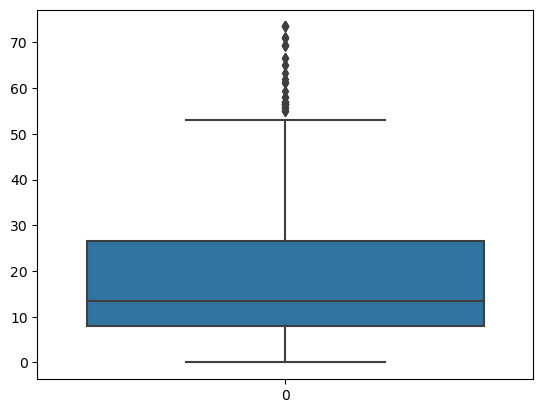

In [26]:
#removing the outliers
q1=df['fare'].quantile(0.25)
q3=df['fare'].quantile(0.75)
iqr=q3-q1
df=df[(df['fare']>=q1-1.5*iqr)&(df['fare']<=q3+1.5*iqr)]
sns.boxplot(df['fare'])

<AxesSubplot:>

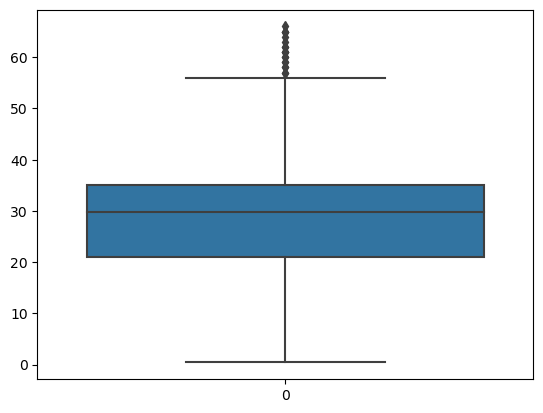

In [27]:
#z-score method
from scipy import stats
z=np.abs(stats.zscore(df['age']))
threshold=3
df=df[(z<threshold)]
sns.boxplot(df['age'])

## Data Normalization

You Need Scikit-Learn Library
To install scikit-learn, use the following command:
```
conda install scikit-learn
```

In [28]:
from sklearn.preprocessing import MinMaxScaler
#select the columns to normalize
cols_to_norm=['age','fare']
#Scaler
scaler=MinMaxScaler()
#apply the scaler
df[cols_to_norm]=scaler.fit_transform(df[cols_to_norm])
#checking the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,0.329064,1,0,0.098639,S,Third,man,True,Southampton,False
1,1,1,female,0.573041,1,0,0.969841,C,First,woman,False,Cherbourg,False
2,1,3,female,0.390058,0,0,0.107823,S,Third,woman,False,Southampton,True
3,1,1,female,0.527295,1,0,0.722449,S,First,woman,False,Southampton,False
4,0,3,male,0.527295,0,0,0.109524,S,Third,man,True,Southampton,True


In [29]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,0.365385,2.430473,0.431114,0.514793,0.393491,0.269958
std,0.481894,0.757904,0.195825,1.024769,0.835625,0.209171
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.313815,0.000000,0.000000,0.107823
50%,0.000000,3.000000,0.446464,0.000000,0.000000,0.183673
75%,1.000000,3.000000,0.527295,1.000000,0.000000,0.361224
max,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000


x_standardized = (x - x.mean()) / x.std()
where:
x is the original value and x_standardized is the standardized value 

In [30]:
#standard scaler
from sklearn.preprocessing import StandardScaler
#select the columns to normalize
cols_to_norm=['age','fare']
#Scaler
scaler=StandardScaler()
#apply the scaler
df[cols_to_norm]=scaler.fit_transform(df[cols_to_norm])
#checking the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,-0.521517,1,0,-0.819640,S,Third,man,True,Southampton,False
1,1,1,female,0.725296,1,0,3.348455,C,First,woman,False,Cherbourg,False
2,1,3,female,-0.209814,0,0,-0.775702,S,Third,woman,False,Southampton,True
3,1,1,female,0.491519,1,0,2.164857,S,First,woman,False,Southampton,False
4,0,3,male,0.491519,0,0,-0.767566,S,Third,man,True,Southampton,True


<AxesSubplot:xlabel='age', ylabel='fare'>

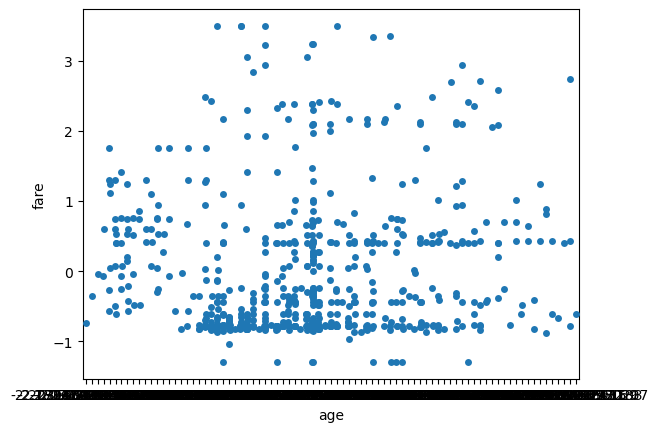

In [35]:
sns.stripplot(x=df['age'],y=df['fare'])

### Log Transformation

In [36]:
kashti=sns.load_dataset('titanic')
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
kashti['age'].fillna(df['age'].mean(),inplace=True)

In [38]:
kashti['age']=np.log(kashti['age'])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
kashti['fare']=np.log(kashti['fare'])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:>

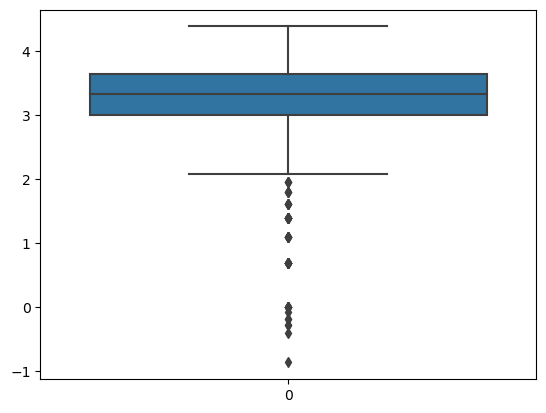

In [41]:
sns.boxplot(kashti['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

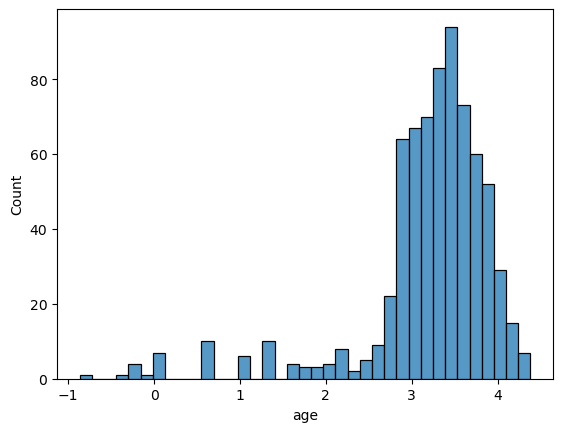

In [42]:
sns.histplot(kashti['age'])

In [43]:
df1=sns.load_dataset('titanic')

<AxesSubplot:xlabel='age', ylabel='Count'>

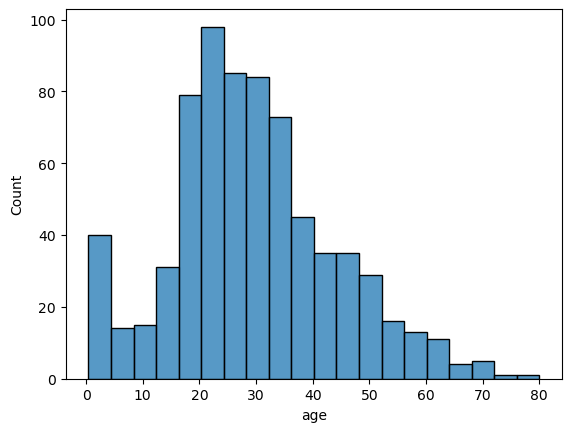

In [44]:
sns.histplot(df1['age'])

## Organizing Data

In [ ]:
#saving organized data
df.to_csv('titanic_preproccessed.csv',index=False)